In [11]:
import numpy as np
import pandas as pd
import re     #searching text in a document
from nltk.corpus import stopwords #words which doesnt add much value about context of data
from nltk.stem.porter import PorterStemmer #root word
from sklearn.feature_extraction.text import TfidfVectorizer #words to numbers
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [12]:
pip install nltk

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [13]:
import nltk 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/iftikarasif/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [15]:
dataset = pd.read_csv("train.csv")

In [16]:
dataset.shape 

(20800, 5)

In [17]:
dataset.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [18]:
dataset.tail()

,id,title,author,text,label
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1
20799,20799,What Keeps the F-35 Alive,David Swanson,"David Swanson is an author, activist, journa...",1


In [19]:
dataset.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [20]:
#we replace the null values with empty string
dataset = dataset.fillna('')

In [48]:
dataset['News'] = dataset['title'] + dataset['author']
dataset.head(15)

,id,title,author,text,label,News
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Why the Truth Might Get You FiredConsortiumnew...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,15 Civilians Killed In Single US Airstrike Hav...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Iranian woman jailed for fictional unpublished...
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0,Jackie Mason: Hollywood Would Love Trump if He...
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,,Ever wonder how Britain’s most iconic pop pian...,1,Life: Life Of Luxury: Elton John’s 6 Favorite ...
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0,Benoît Hamon Wins French Socialist Party’s Pre...
8,8,Excerpts From a Draft Script for Donald Trump’...,,Donald J. Trump is scheduled to make a highly ...,0,Excerpts From a Draft Script for Donald Trump’...
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0,"A Back-Channel Plan for Ukraine and Russia, Co..."


In [22]:
#drop the label
A = dataset.drop(columns = "label", axis = 1)
B = dataset['label']

In [49]:
A.head(15)

,id,title,author,text,News
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",Why the Truth Might Get You FiredConsortiumnew...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,15 Civilians Killed In Single US Airstrike Hav...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,Iranian woman jailed for fictional unpublished...
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",Jackie Mason: Hollywood Would Love Trump if He...
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,,Ever wonder how Britain’s most iconic pop pian...,Life: Life Of Luxury: Elton John’s 6 Favorite ...
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",Benoît Hamon Wins French Socialist Party’s Pre...
8,8,Excerpts From a Draft Script for Donald Trump’...,,Donald J. Trump is scheduled to make a highly ...,Excerpts From a Draft Script for Donald Trump’...
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,"A Back-Channel Plan for Ukraine and Russia, Co..."


In [24]:
#Stemming procedure
port_stem = PorterStemmer()
def stemming(News):
    stemmed_content = re.sub('[^a-zA-Z]', ' ', News)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

# Assuming dataset is already defined with a 'News' column
# Apply the stemming procedure to the 'News' column
dataset['News'] = dataset['News'].apply(stemming)

In [25]:
print(dataset['News'])

0        hous dem aid even see comey letter jason chaff...
1        flynn hillari clinton big woman campu breitbar...
2                   truth might get firedconsortiumnew com
3        civilian kill singl us airstrik identifiedjess...
4        iranian woman jail fiction unpublish stori wom...
                               ...                        
20795    rapper trump poster child white supremaci jero...
20796    n f l playoff schedul matchup odd new york tim...
20797    maci said receiv takeov approach hudson bay ne...
20798    nato russia hold parallel exercis balkansalex ...
20799                            keep f alivedavid swanson
Name: News, Length: 20800, dtype: object


In [26]:
#separating the data and label
X = dataset['News'].values
Y = dataset['label'].values

In [27]:
print(X)

['hous dem aid even see comey letter jason chaffetz tweet itdarrel lucu'
 'flynn hillari clinton big woman campu breitbartdaniel j flynn'
 'truth might get firedconsortiumnew com' ...
 'maci said receiv takeov approach hudson bay new york timesmichael j de la merc rachel abram'
 'nato russia hold parallel exercis balkansalex ansari'
 'keep f alivedavid swanson']


In [28]:
print(Y)

[1 0 1 ... 0 1 1]


In [29]:
Y.shape

(20800,)

In [30]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X)
X = vectorizer.transform(X)   #text data to the numerical data

In [31]:
print(X)

  (0, 21557)	0.2736369479869461
  (0, 18009)	0.2438301027041085
  (0, 11974)	0.34466883664274506
  (0, 11617)	0.2783091851108118
  (0, 10495)	0.311553446057155
  (0, 10381)	0.41343221816522613
  (0, 9475)	0.20871803491508256
  (0, 6798)	0.22134331972572915
  (0, 5178)	0.25645024223907936
  (0, 3933)	0.23592778464338887
  (0, 3291)	0.34851330509336254
  (0, 381)	0.25686395241555227
  (1, 23108)	0.2952143706864955
  (1, 9174)	0.18812765977413537
  (1, 7534)	0.6987204016565229
  (1, 3714)	0.18820851327454977
  (1, 2957)	0.37436858023248293
  (1, 2482)	0.3616637468521842
  (1, 1956)	0.2878737833766196
  (2, 21453)	0.41331452278016145
  (2, 12835)	0.4627692646157023
  (2, 8113)	0.3260098284202015
  (2, 7391)	0.6469324358467595
  (2, 3910)	0.30035267305096314
  (3, 21978)	0.23565193182482072
  :	:
  (20797, 23430)	0.08239795721216821
  (20797, 20788)	0.19858848268663878
  (20797, 19961)	0.32033450422171095
  (20797, 17564)	0.24595228419376997
  (20797, 16511)	0.2701082984026285
  (20797, 162

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, stratify= Y,random_state= 2)  #stratify in orginal proportion

In [33]:
print(X_train)

  (0, 23430)	0.09912213710860748
  (0, 20970)	0.36070449875669236
  (0, 18566)	0.3306479332638775
  (0, 17406)	0.2684352044457877
  (0, 16712)	0.3896505350040651
  (0, 15969)	0.2446678808914447
  (0, 13686)	0.09579955138594934
  (0, 13584)	0.3006243217715783
  (0, 4249)	0.3371952858778594
  (0, 3693)	0.3778185500727602
  (0, 464)	0.3331539972769514
  (1, 23430)	0.07265050837100448
  (1, 21139)	0.22748636335279995
  (1, 21129)	0.2680509236111449
  (1, 20533)	0.3387881663753806
  (1, 17976)	0.3387881663753806
  (1, 15182)	0.3085013084039848
  (1, 13686)	0.07021525476470997
  (1, 13396)	0.2492769130503204
  (1, 13128)	0.3387881663753806
  (1, 7282)	0.28243982457667277
  (1, 2918)	0.3387881663753806
  (1, 1302)	0.28559018480465137
  (1, 1260)	0.2973796343682552
  (2, 23430)	0.08339964850961508
  :	:
  (16637, 19051)	0.27907361597662245
  (16637, 15634)	0.335720697120627
  (16637, 13686)	0.08431963194644332
  (16637, 13332)	0.3268633738840873
  (16637, 11022)	0.31962641385543167
  (16637, 6

In [34]:
print(y_train)

[0 0 0 ... 0 0 1]


In [38]:
model = LogisticRegression()

In [40]:
model.fit(X_train, y_train)

LogisticRegression()

In [41]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)
print("Accuracy score of training data: ", training_data_accuracy )

Accuracy score of training data:  0.9825120192307693


In [44]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)
print("Accuracy score of training data: ", test_data_accuracy )


Accuracy score of training data:  0.9673076923076923


In [46]:
#Make a predictive system

X_new = X_test[0]
prediction = model.predict(X_new)
print(prediction)

if prediction == 0:
    print("The news is real")
else:
    print("The news is fake")   

[1]
The news is fake


In [47]:
print(y_test[0])

1


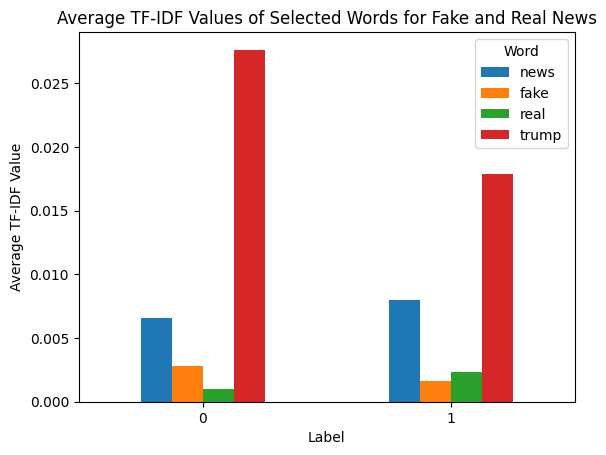

In [62]:
#Here's an example of how you could create a bar plot to show the average TF-IDF values of selected words for both fake and real news:#


import matplotlib.pyplot as plt

# Select a few words (features) for visualization
selected_words = ['news', 'fake', 'real', 'trump']

# Filter the DataFrame to include only the selected words
selected_tfidf_df = tfidf_df[selected_words + ['label']]

# Group by label and calculate the average TF-IDF values for each selected word
word_avg_tfidf = selected_tfidf_df.groupby('label')[selected_words].mean()

# Plotting
word_avg_tfidf.plot(kind='bar')
plt.xlabel('Label')
plt.ylabel('Average TF-IDF Value')
plt.title('Average TF-IDF Values of Selected Words for Fake and Real News')
plt.xticks(rotation=0)
plt.legend(title='Word')
plt.show()


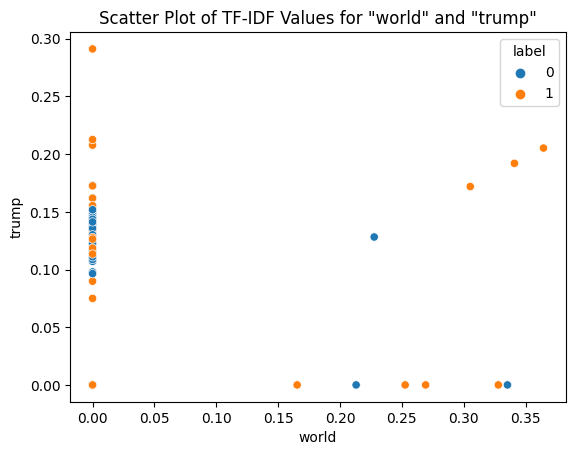

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you've already defined X_train, y_train, X_test, and y_test

# Create a DataFrame with TF-IDF values and labels
tfidf_df_train = pd.DataFrame(X_train.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df_train['label'] = y_train

# Choose two words for scatter plot
word1 = 'world'  # Replace with an actual word from your dataset
word2 = 'trump'  # Replace with another actual word from your dataset

# Scatter plot of TF-IDF values for two words
sns.scatterplot(x=word1, y=word2, hue='label', data=tfidf_df_train.sample(500))
plt.title(f'Scatter Plot of TF-IDF Values for "{word1}" and "{word2}"')
plt.show()
